In [77]:
import numpy as np
import random as rnd

In [78]:
n_particles = 5

In [79]:
def rastrigin(A, n, x):
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

A = 2
n = 5
x_values = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

print(rastrigin(A, n, x_values))

12.549999999999999


In [90]:
def create(particles, interval, dimension):
    points = []
    for i in range(dimension):
        # if dimension != len(interval):
        #     points.append([np.random.uniform(interval[0], interval[1]) for _ in range(particles)])
        # else:
        points.append([np.random.uniform(interval[i][0], interval[i][1]) for _ in range(particles)])
    return np.array(points)


# space = [
#     [2.6, 3.6],
#     [0.7, 0.8],
#     [17, 28],
#     [7.3, 8.3],
#     [7.8, 8.3],
#     [2.9, 3.9],
#     [5, 5.5]
# ]



mas = create(5, [[-5, 5]]*10, 10)
print((mas))

[[-1.34409921 -2.66651337 -2.93008824 -0.19669746  1.6638899 ]
 [ 2.41718922  1.8947694   1.03562329 -0.04721922  0.62189754]
 [ 3.37173084 -1.24893759 -2.33120196  3.49265119 -4.44863544]
 [ 0.53547605  1.92754355 -3.73826703  1.16661119 -4.59475576]
 [-1.95406446  1.01443092  0.36042799  0.85081941 -2.58314338]
 [ 4.05365372  1.10738029  1.46039188  2.06649069  3.35232963]
 [-1.10693194 -1.38439998 -2.54355041 -0.74765561 -3.12292941]
 [-3.64107999  3.26223567 -3.99045639 -4.31309816  1.45361058]
 [ 2.43722447 -2.48022461  3.73702939 -3.89508376  3.19595606]
 [-2.38661859  4.40151898 -0.74638682 -4.19857264 -4.76448238]]


In [91]:
print(mas)

[[-1.34409921 -2.66651337 -2.93008824 -0.19669746  1.6638899 ]
 [ 2.41718922  1.8947694   1.03562329 -0.04721922  0.62189754]
 [ 3.37173084 -1.24893759 -2.33120196  3.49265119 -4.44863544]
 [ 0.53547605  1.92754355 -3.73826703  1.16661119 -4.59475576]
 [-1.95406446  1.01443092  0.36042799  0.85081941 -2.58314338]
 [ 4.05365372  1.10738029  1.46039188  2.06649069  3.35232963]
 [-1.10693194 -1.38439998 -2.54355041 -0.74765561 -3.12292941]
 [-3.64107999  3.26223567 -3.99045639 -4.31309816  1.45361058]
 [ 2.43722447 -2.48022461  3.73702939 -3.89508376  3.19595606]
 [-2.38661859  4.40151898 -0.74638682 -4.19857264 -4.76448238]]


In [108]:
import math

def rastrigin(X):
    n = len(X)  
    return 10*n + sum([xi**2 - 10*np.cos(2*np.pi*xi) for xi in X])

print(rastrigin(mas))

[192.87333065 152.92718677 171.83839132 140.56200737 249.7074011 ]


In [ ]:
import numpy as np

class ABC:
    def __init__(self, func, bounds, colony_size=30, max_iter=1000, limit=100):
        self.func = func
        self.bounds = bounds
        self.colony_size = colony_size
        self.max_iter = max_iter
        self.limit = limit
        self.best_solution = None
        self.best_fitness = np.inf

    def optimize(self):
        dim = len(self.bounds)
        colony = np.random.uniform(low=self.bounds[:, 0], high=self.bounds[:, 1], size=(self.colony_size, dim))
        fitness = np.array([self.func(agent) for agent in colony])
        best_index = np.argmin(fitness)
        self.best_solution = colony[best_index]
        self.best_fitness = fitness[best_index]
        
        limit_counter = 0
        for _ in range(self.max_iter):
            if limit_counter > self.limit:
                break
            for i in range(self.colony_size):
                neighbor_index = np.random.choice([idx for idx in range(self.colony_size) if idx != i])
                phi = np.random.uniform(low=-1, high=1, size=dim)
                candidate = colony[i] + phi * (colony[i] - colony[neighbor_index])
                candidate = np.clip(candidate, self.bounds[:, 0], self.bounds[:, 1])
                candidate_fitness = self.func(candidate)
                if candidate_fitness < fitness[i]:
                    colony[i] = candidate
                    fitness[i] = candidate_fitness
                    limit_counter = 0
                else:
                    limit_counter += 1
            best_index = np.argmin(fitness)
            if fitness[best_index] < self.best_fitness:
                self.best_solution = colony[best_index]
                self.best_fitness = fitness[best_index]
        return self.best_solution, self.best_fitness

# Define Rastrigin function
def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x])

# Define Rosenbrock function
def rosenbrock(x):
    return sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

# Define bounds for Rastrigin function
#rastrigin_bounds = np.array([[-5.12, 5.12]] * 10)

# Define bounds for Rosenbrock function
rosenbrock_bounds = np.array([[-1.5, 1.5], [-0.5, 2.5]])

# Create ABC optimizer objects
#rastrigin_optimizer = ABC(rastrigin, rastrigin_bounds)
rosenbrock_optimizer = ABC(rosenbrock, rosenbrock_bounds, colony_size=50, max_iter=2000)

# Optimize functions
#rastrigin_solution, rastrigin_fitness = rastrigin_optimizer.optimize()
rosenbrock_solution, rosenbrock_fitness = rosenbrock_optimizer.optimize()

#print("Rastrigin Solution:", rastrigin_solution)
#print("Rastrigin Fitness:", rastrigin_fitness)
print("Rosenbrock Solution:", rosenbrock_solution)
print("Rosenbrock Fitness:", rosenbrock_fitness)


Rosenbrock Solution: [0.97619764 0.95302337]
Rosenbrock Fitness: 0.0005669313325282006


# Code

KeyboardInterrupt: 

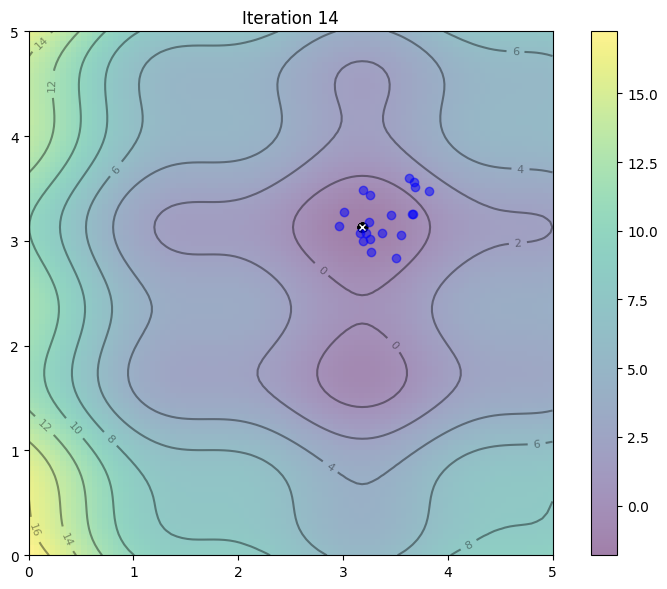

In [ ]:
import numpy as np
from functions import *
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)

# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8
iterations = 50

values = {'X':[], 'pbest': []}

# Create particles
n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1

# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

def update():
    for _ in range(iterations):
        global V, X, pbest, pbest_obj, gbest, gbest_obj
        r1, r2 = np.random.rand(2)
        V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
        X = X + V
        obj = f(X[0], X[1])
        pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
        pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
        gbest = pbest[:, pbest_obj.argmin()]
        gbest_obj = pbest_obj.min()
        values['X'].append(X)
        values['pbest'].append(pbest)
    
update()

#---------------------------------------------------------------------------------------------

# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)

# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

# points
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)

def animate(i):
    # if i == iterations:
    #     return
    # print(i)
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(values['pbest'][i].T)
    p_plot.set_offsets(values['X'][i].T)
    
    return ax, pbest_plot, p_plot

anim = FuncAnimation(fig, animate,  frames=len(values['X']), interval=200, blit=False, repeat=False)
#anim = FuncAnimation(fig, animate, interval=500)
anim.save("PSO.gif", dpi=120, writer="pillow")

# print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
# print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))